In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

Just checking the data of one stock as of now

In [4]:
INFY_df = pd.read_csv("D:\Study\Project\Stocks-Visualizing-and-Analysis\Datasets\INFY.NS.csv")
INFY_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-02,570.500000,574.775024,560.650024,568.575012,501.081512,8072702
1,2018-04-03,567.349976,571.775024,564.049988,570.224976,502.535675,4077168
2,2018-04-04,572.000000,572.275024,560.000000,562.099976,495.375122,4813302
3,2018-04-05,569.775024,575.650024,564.549988,573.775024,505.664398,7763544
4,2018-04-06,571.500000,573.000000,561.049988,563.500000,496.608948,5937742


In [5]:
#as the data is too big. i am rounding of the data aftdr decimals.
INFY_df = INFY_df.round(2)
INFY_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-02,570.50,574.78,560.65,568.58,501.08,8072702
1,2018-04-03,567.35,571.78,564.05,570.22,502.54,4077168


In [6]:
INFY_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
INFY_df.dropna(inplace = True, axis = 0)

In [8]:
#here is checked the size of data
INFY_df.shape

(989, 7)

In [9]:
#here checking if there is any null values in the dataset
INFY_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

in the output of null values we found that there is not null value in the dataset

In [10]:
#lets check the datatypes of each the column
INFY_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [11]:
#here we can see that data is in object format. pandas has inbuilt functions for data but the data should be in type ‘datetime64(ns)’
INFY_df['Date'] = pd.to_datetime(INFY_df['Date'])
INFY_df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-02,570.50,574.78,560.65,568.58,501.08,8072702
1,2018-04-03,567.35,571.78,564.05,570.22,502.54,4077168


In [12]:
INFY_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

here we can see that the datatype of the data column changed to datetime64[ns]

In [13]:
#here we can check total duration of analysis
INFY_df['Date'].max()-INFY_df['Date'].min()

Timedelta('1459 days 00:00:00')

In [23]:
#describe function in pandas is used to get the descriptive data from the data. and with that i have used to astype to change the data from the float to the int.
INFY_df.iloc[-90:].describe().astype(int)

,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
count,90,90,90,90,90,90,90
mean,1790,1809,1772,1791,1753,6421467,0
std,76,73,75,75,73,3314026,1
min,1681,1709,1665,1678,1642,1823469,-3
25%,1718,1743,1704,1726,1689,4167851,0
50%,1769,1783,1747,1771,1734,5358059,0
75%,1864,1888,1844,1865,1825,7654222,1
max,1938,1953,1930,1939,1898,18887243,3


# General Variation in the Stock Price

In [15]:
#to set the date column to index in dataframe to make the plotting easy
INFY_df.index = INFY_df['Date']

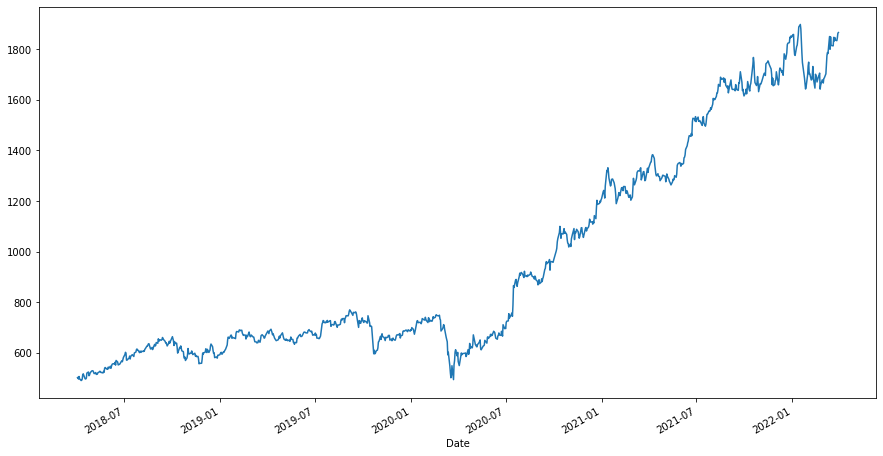

In [16]:
INFY_df['Adj Close'].plot(figsize = (15,8))
plt.show()

# Day to Day percentage change 

What does daily percentage means?

So if the stock opening prie is 100rs and the stock closes as 150rs. So the percentage change here is 50%

In [18]:
INFY_df['Day_Perc_Change'] = INFY_df['Adj Close'].pct_change()*100
INFY_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
Date,,,,,,,,
2018-04-02,2018-04-02,570.50,574.78,560.65,568.58,501.08,8072702,NaN
2018-04-03,2018-04-03,567.35,571.78,564.05,570.22,502.54,4077168,0.291371
2018-04-04,2018-04-04,572.00,572.28,560.00,562.10,495.38,4813302,-1.424762
2018-04-05,2018-04-05,569.78,575.65,564.55,573.78,505.66,7763544,2.075175
2018-04-06,2018-04-06,571.50,573.00,561.05,563.50,496.61,5937742,-1.789740


In [19]:
INFY_df.dropna(axis = 0, inplace = True)

<AxesSubplot: xlabel='Date'>

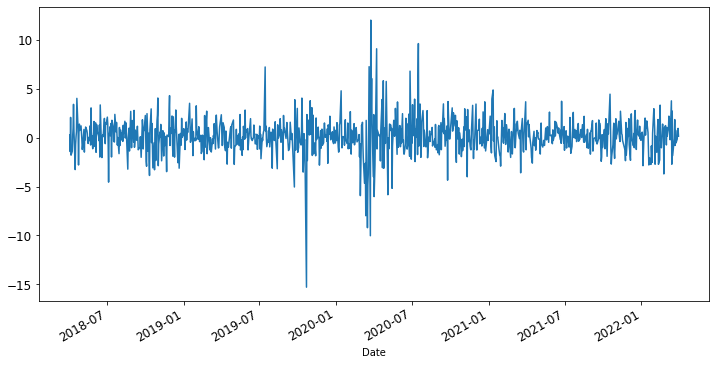

In [20]:
INFY_df['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

I observed here that the mostly the spike is between the -2% and 2% and there are some few spikes between 10 to -10 percent on both the sides.

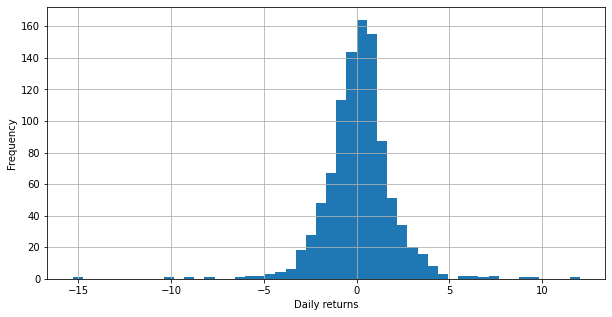

count    988.000000
mean       0.150372
std        1.850300
min      -15.305948
25%       -0.783666
50%        0.153257
75%        1.012761
max       12.032682
Name: Day_Perc_Change, dtype: float64

In [21]:
INFY_df['Day_Perc_Change'].hist(bins = 50, figsize = (10,5)) 
plt.xlabel('Daily returns')
plt.ylabel('Frequency')
plt.show()#satistics
INFY_df.Day_Perc_Change.describe()

# Trend Analysis

Here we will make a function to define the trend. Will do it with the if  else statements.

In [22]:
def trend(x):
    if x > -0.5 and x <= 0.5:
        return 'Slight or No change'
    elif x > 0.5 and x <= 1:
        return 'Slight Positive'
    elif x > -1 and x <= -0.5:
        return 'Slight Negative'
    elif x > 1 and x <= 3:
        return 'Positive'
    elif x > -3 and x <= -1:
        return 'Negative'
    elif x > 3 and x <= 7:
        return 'Among top gainers'
    elif x > -7 and x <= -3:
        return 'Among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'
INFY_df['Trend']= np.zeros(INFY_df['Day_Perc_Change'].count())
INFY_df['Trend']= INFY_df['Day_Perc_Change'].apply(lambda x:trend(x))
INFY_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2018-04-03,2018-04-03,567.35,571.78,564.05,570.22,502.54,4077168,0.291371,Slight or No change
2018-04-04,2018-04-04,572.00,572.28,560.00,562.10,495.38,4813302,-1.424762,Negative
2018-04-05,2018-04-05,569.78,575.65,564.55,573.78,505.66,7763544,2.075175,Positive
2018-04-06,2018-04-06,571.50,573.00,561.05,563.50,496.61,5937742,-1.789740,Negative
2018-04-09,2018-04-09,562.50,562.90,553.28,555.62,489.67,7202882,-1.397475,Negative


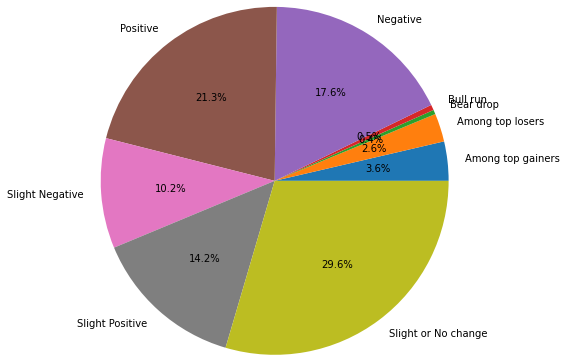

In [24]:
HUL_pie_data = INFY_df.groupby('Trend')
pie_label = sorted([i for i in INFY_df.loc[:, 'Trend'].unique()])
plt.pie(HUL_pie_data['Trend'].count(), labels = pie_label, autopct = '%1.1f%%', radius = 2)

plt.show()

<AxesSubplot: xlabel='Date'>

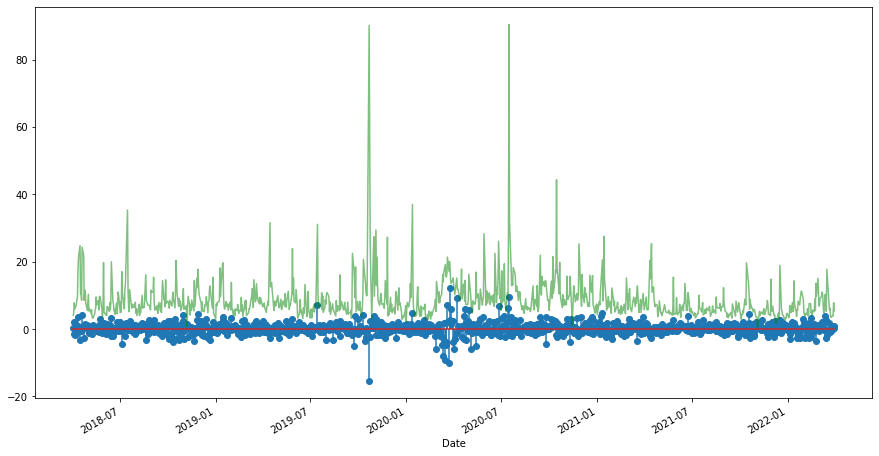

In [25]:
plt.stem(INFY_df['Date'], INFY_df['Day_Perc_Change'])
(INFY_df['Volume']/1000000).plot(figsize = (15, 8), color = 'green', alpha = 0.5)